In [ ]:
!pip install nltk spacy textblob pdfplumber textacy streamlit-pydeck plotly
!python -m spacy download en_core_web_sm


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving general meeting.pdf to general meeting (1).pdf


In [ ]:

import pdfplumber

with pdfplumber.open('general meeting.pdf') as pdf:
    text = ''
    for page in pdf.pages:
        text += page.extract_text()
!p
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Meeting Minutes: Annual Budgeting Follow-up Meeting for Cleaning Company\nDate: July 24, 2024\nTime:10:00 AM - 11:30 AM\nLocation: Conference Room 1, Headquarters\nAttendees:\nJohn Doe - CEO\nJane Smith - CFO\nMichael Brown - Operations Manager\nEmily White - HR Manager\nRichard Lee - Marketing Manager\nLinda Green - Procurement Manager\nNancy Turner - Administrative Assistant (Minute Taker)\nOpening Remarks\nJohn Doe commenced the meeting at 10:00 AM, welcoming all participants and expressing\nappreciation for their continued dedication.', 'He emphasized the critical nature of this follow-up\nmeeting to review the initial implementation stages of the newly approved budget and address any\nimmediate issues or adjustments needed.', "Review of Budget Implementation\nJane Smith provided an overview of the budget's initial implementation phase.", 'She highlighted\nthat most departments had successfully begun their allocated projects and spending plans.', 'Jane\nnoted a few discrepancies 

In [ ]:
from nltk.tokenize import word_tokenize

words = [word_tokenize(sentence) for sentence in sentences]

print(words)

[['Meeting', 'Minutes', ':', 'Annual', 'Budgeting', 'Follow-up', 'Meeting', 'for', 'Cleaning', 'Company', 'Date', ':', 'July', '24', ',', '2024', 'Time:10:00', 'AM', '-', '11:30', 'AM', 'Location', ':', 'Conference', 'Room', '1', ',', 'Headquarters', 'Attendees', ':', 'John', 'Doe', '-', 'CEO', 'Jane', 'Smith', '-', 'CFO', 'Michael', 'Brown', '-', 'Operations', 'Manager', 'Emily', 'White', '-', 'HR', 'Manager', 'Richard', 'Lee', '-', 'Marketing', 'Manager', 'Linda', 'Green', '-', 'Procurement', 'Manager', 'Nancy', 'Turner', '-', 'Administrative', 'Assistant', '(', 'Minute', 'Taker', ')', 'Opening', 'Remarks', 'John', 'Doe', 'commenced', 'the', 'meeting', 'at', '10:00', 'AM', ',', 'welcoming', 'all', 'participants', 'and', 'expressing', 'appreciation', 'for', 'their', 'continued', 'dedication', '.'], ['He', 'emphasized', 'the', 'critical', 'nature', 'of', 'this', 'follow-up', 'meeting', 'to', 'review', 'the', 'initial', 'implementation', 'stages', 'of', 'the', 'newly', 'approved', 'budg

In [ ]:
nltk.download('averaged_perceptron_tagger')

pos_tags = [nltk.pos_tag(word_tokenize(sentence)) for sentence in sentences]
print(pos_tags)

[[('Meeting', 'VBG'), ('Minutes', 'NNS'), (':', ':'), ('Annual', 'JJ'), ('Budgeting', 'NNP'), ('Follow-up', 'NNP'), ('Meeting', 'NNP'), ('for', 'IN'), ('Cleaning', 'NNP'), ('Company', 'NNP'), ('Date', 'NNP'), (':', ':'), ('July', 'NNP'), ('24', 'CD'), (',', ','), ('2024', 'CD'), ('Time:10:00', 'NNP'), ('AM', 'NNP'), ('-', ':'), ('11:30', 'CD'), ('AM', 'NNP'), ('Location', 'NNP'), (':', ':'), ('Conference', 'NN'), ('Room', 'NNP'), ('1', 'CD'), (',', ','), ('Headquarters', 'NNP'), ('Attendees', 'NNP'), (':', ':'), ('John', 'NNP'), ('Doe', 'NNP'), ('-', ':'), ('CEO', 'NNP'), ('Jane', 'NNP'), ('Smith', 'NNP'), ('-', ':'), ('CFO', 'NNP'), ('Michael', 'NNP'), ('Brown', 'NNP'), ('-', ':'), ('Operations', 'NNPS'), ('Manager', 'NNP'), ('Emily', 'NNP'), ('White', 'NNP'), ('-', ':'), ('HR', 'NNP'), ('Manager', 'NNP'), ('Richard', 'NNP'), ('Lee', 'NNP'), ('-', ':'), ('Marketing', 'NN'), ('Manager', 'NNP'), ('Linda', 'NNP'), ('Green', 'NNP'), ('-', ':'), ('Procurement', 'NN'), ('Manager', 'NNP'), (

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_words = [[lemmatizer.lemmatize(word) for word in word_tokenize(sentence)] for sentence in sentences]
print(lemmatized_words)

[['Meeting', 'Minutes', ':', 'Annual', 'Budgeting', 'Follow-up', 'Meeting', 'for', 'Cleaning', 'Company', 'Date', ':', 'July', '24', ',', '2024', 'Time:10:00', 'AM', '-', '11:30', 'AM', 'Location', ':', 'Conference', 'Room', '1', ',', 'Headquarters', 'Attendees', ':', 'John', 'Doe', '-', 'CEO', 'Jane', 'Smith', '-', 'CFO', 'Michael', 'Brown', '-', 'Operations', 'Manager', 'Emily', 'White', '-', 'HR', 'Manager', 'Richard', 'Lee', '-', 'Marketing', 'Manager', 'Linda', 'Green', '-', 'Procurement', 'Manager', 'Nancy', 'Turner', '-', 'Administrative', 'Assistant', '(', 'Minute', 'Taker', ')', 'Opening', 'Remarks', 'John', 'Doe', 'commenced', 'the', 'meeting', 'at', '10:00', 'AM', ',', 'welcoming', 'all', 'participant', 'and', 'expressing', 'appreciation', 'for', 'their', 'continued', 'dedication', '.'], ['He', 'emphasized', 'the', 'critical', 'nature', 'of', 'this', 'follow-up', 'meeting', 'to', 'review', 'the', 'initial', 'implementation', 'stage', 'of', 'the', 'newly', 'approved', 'budget

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [[word for word in word_tokenize(sentence) if word.lower() not in stop_words] for sentence in sentences]
print(filtered_words)

[['Meeting', 'Minutes', ':', 'Annual', 'Budgeting', 'Follow-up', 'Meeting', 'Cleaning', 'Company', 'Date', ':', 'July', '24', ',', '2024', 'Time:10:00', '-', '11:30', 'Location', ':', 'Conference', 'Room', '1', ',', 'Headquarters', 'Attendees', ':', 'John', 'Doe', '-', 'CEO', 'Jane', 'Smith', '-', 'CFO', 'Michael', 'Brown', '-', 'Operations', 'Manager', 'Emily', 'White', '-', 'HR', 'Manager', 'Richard', 'Lee', '-', 'Marketing', 'Manager', 'Linda', 'Green', '-', 'Procurement', 'Manager', 'Nancy', 'Turner', '-', 'Administrative', 'Assistant', '(', 'Minute', 'Taker', ')', 'Opening', 'Remarks', 'John', 'Doe', 'commenced', 'meeting', '10:00', ',', 'welcoming', 'participants', 'expressing', 'appreciation', 'continued', 'dedication', '.'], ['emphasized', 'critical', 'nature', 'follow-up', 'meeting', 'review', 'initial', 'implementation', 'stages', 'newly', 'approved', 'budget', 'address', 'immediate', 'issues', 'adjustments', 'needed', '.'], ['Review', 'Budget', 'Implementation', 'Jane', 'Smi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

dependency_parse = [(token.text, token.dep_, token.head.text) for token in doc]
noun_phrases = [chunk.text for chunk in doc.noun_chunks]
entities = [(entity.text, entity.label_) for entity in doc.ents]

print("Dependency Parse:", dependency_parse)
print("Noun Phrases:", noun_phrases)
print("Entities:", entities)

Dependency Parse: [('Meeting', 'compound', 'Minutes'), ('Minutes', 'dep', 'Attendees'), (':', 'punct', 'Minutes'), ('Annual', 'amod', 'Meeting'), ('Budgeting', 'compound', 'Follow'), ('Follow', 'nmod', 'Meeting'), ('-', 'punct', 'up'), ('up', 'prt', 'Follow'), ('Meeting', 'appos', 'Minutes'), ('for', 'prep', 'Meeting'), ('Cleaning', 'compound', 'Company'), ('Company', 'compound', 'Date'), ('\n', 'dep', 'Company'), ('Date', 'pobj', 'for'), (':', 'punct', 'Meeting'), ('July', 'npadvmod', 'Minutes'), ('24', 'nummod', 'July'), (',', 'punct', 'July'), ('2024', 'nummod', 'July'), ('\n', 'dep', '2024'), ('Time:10:00', 'compound', 'AM'), ('AM', 'appos', 'July'), ('-', 'punct', 'AM'), ('11:30', 'nummod', 'Location'), ('AM', 'compound', 'Location'), ('\n', 'dep', 'AM'), ('Location', 'appos', 'AM'), (':', 'punct', 'July'), ('Conference', 'compound', 'Room'), ('Room', 'appos', 'July'), ('1', 'nummod', 'Room'), (',', 'punct', 'Attendees'), ('Headquarters', 'compound', 'Attendees'), ('\n', 'dep', 'H

In [ ]:
text = text.lower()
import string

text = text.translate(str.maketrans('', '', string.punctuation))
print(text)


meeting minutes annual budgeting followup meeting for cleaning company
date july 24 2024
time1000 am  1130 am
location conference room 1 headquarters
attendees
john doe  ceo
jane smith  cfo
michael brown  operations manager
emily white  hr manager
richard lee  marketing manager
linda green  procurement manager
nancy turner  administrative assistant minute taker
opening remarks
john doe commenced the meeting at 1000 am welcoming all participants and expressing
appreciation for their continued dedication he emphasized the critical nature of this followup
meeting to review the initial implementation stages of the newly approved budget and address any
immediate issues or adjustments needed
review of budget implementation
jane smith provided an overview of the budgets initial implementation phase she highlighted
that most departments had successfully begun their allocated projects and spending plans jane
noted a few discrepancies in the operations budget due to unexpected maintenance costs 

In [ ]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to summarize text using textacy's TextRank
def summarize(text, ratio=0.2):
    doc = nlp(text)
    summary = textacy.extract.keyterms.textrank(doc, topn=int(len(doc) * ratio))
    return summary

# Summarize the text
summary = summarize(text)

# Print the summarized sentences
for sentence in summary:
    print(sentence)


('budget initial implementation phase', 0.024857397118214677)
('minute annual budgeting followup meeting', 0.023169521890055923)
('budget adjustment', 0.02272925346370963)
('marketing budget', 0.02004872392001017)
('budget implementation', 0.01872713085336261)
('general contingency budget', 0.018528436105187816)
('operation budget', 0.01754326393829775)
('administrative assistant minute taker', 0.01635500062970711)
('current budget', 0.01596982501900111)
('unexpected operational maintenance cost', 0.01591096466747384)
('john doe ceo', 0.014520968456448017)
('department immediate need', 0.013624400191410506)
('nancy turner administrative assist', 0.01357949840700701)
('closing remarksjohn doe', 0.013035563306688876)
('review meeting', 0.012283754368464038)
('marketing department', 0.012005532144504045)
('staff training program', 0.011917127388372448)
('unexpected maintenance cost', 0.011858852170789608)
('allocation jane smith', 0.011098606282368972)
('initial implementation stage', 0.0

DATA VISALIZATION

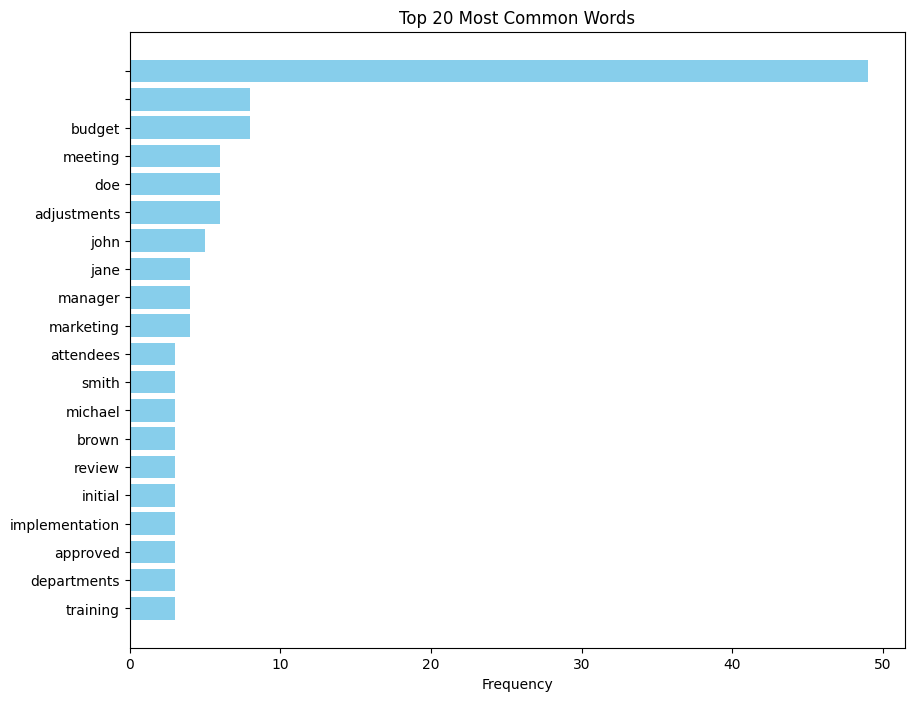

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Tokenize the text
doc = nlp(text)
words = [token.text for token in doc if not token.is_stop and not token.is_punct]

# Compute word frequencies
word_freq = Counter(words)

# Plot word frequency
most_common_words = word_freq.most_common(20)
labels, values = zip(*most_common_words)
plt.figure(figsize=(10, 8))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd # Import the pandas library

# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]
entity_freq = Counter(entities)

# Prepare data for Plotly
entity_data = [{'Entity': k[0], 'Label': k[1], 'Count': v} for k, v in entity_freq.items()]
df_entities = pd.DataFrame(entity_data) # Now you can use 'pd'

# Plot NER
fig = px.bar(df_entities, x='Entity', y='Count', color='Label', title='Named Entities')
fig.show()

In [ ]:
pos_counts = doc.count_by(spacy.attrs.POS)
pos_labels = [doc.vocab.strings[pos] for pos in pos_counts.keys()]

# Prepare data for Plotly
pos_data = [{'POS': label, 'Count': count} for label, count in zip(pos_labels, pos_counts.values())]
df_pos = pd.DataFrame(pos_data)

# Plot POS tags
fig = px.bar(df_pos, x='POS', y='Count', title='Part-of-Speech Tagging')
fig.show()


In [ ]:
import pandas as pd

# Convert summary to a list of strings if needed
summary_strings = [sent[0] for sent in summary]  # Extract the first element of each tuple (assuming it's the string)

# Convert summary to a string
summary_text = ' '.join(summary_strings)  # Join the strings

# Create a DataFrame
data = {
    'text': [text],
    'summary': [summary_text]
}
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('processed_data.txt', index=False)

# Download the CSV file
files.download('processed_data.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import textacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to summarize text using textacy's TextRank
def summarize(text, ratio=0.2):
    doc = nlp(text)
    summary = textacy.extract.keyterms.textrank(doc, topn=int(len(doc) * ratio))
    return summary

# Summarize the text
summary = summarize(text)

# Print the summarized sentences
for sentence in summary:
    print(sentence)


('budget initial implementation phase', 0.024857397118214677)
('minute annual budgeting followup meeting', 0.023169521890055923)
('budget adjustment', 0.02272925346370963)
('marketing budget', 0.02004872392001017)
('budget implementation', 0.01872713085336261)
('general contingency budget', 0.018528436105187816)
('operation budget', 0.01754326393829775)
('administrative assistant minute taker', 0.01635500062970711)
('current budget', 0.01596982501900111)
('unexpected operational maintenance cost', 0.01591096466747384)
('john doe ceo', 0.014520968456448017)
('department immediate need', 0.013624400191410506)
('nancy turner administrative assist', 0.01357949840700701)
('closing remarksjohn doe', 0.013035563306688876)
('review meeting', 0.012283754368464038)
('marketing department', 0.012005532144504045)
('staff training program', 0.011917127388372448)
('unexpected maintenance cost', 0.011858852170789608)
('allocation jane smith', 0.011098606282368972)
('initial implementation stage', 0.0

In [ ]:
import pickle

# Save processed data and summary
processed_data = {
    'text': text,
    'summary': summary_text
}

with open('processed_data.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

# Download the PKL file
files.download('processed_data.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>